In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [51]:
# Function to read and resize images
def read_and_resize_image(image_path, target_size=(100, 100)):
    image = cv2.imread(image_path)  # Read image in BGR format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize image to target size
    return image

In [52]:
# Function to extract features from an image
def extract_features(image):
    # Placeholder function for feature extraction
    # You can replace this with any feature extraction method
    # For demonstration, we'll just flatten the image
    return image.flatten()

In [53]:
# Function to build inverted index
def build_inverted_index(dataset_path):
    inverted_index = {}
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            image_path = os.path.join(root, file)
            image = read_and_resize_image(image_path)
            features = extract_features(image)
            for feature in features:
                if feature not in inverted_index:
                    inverted_index[feature] = []
                inverted_index[feature].append(image_path)
    return inverted_index

In [61]:
# Function to retrieve similar images based on a query feature
def retrieve_similar_images(query_feature, inverted_index):
    similar_images = set()
    for feature in query_feature:
        if feature in inverted_index:
            similar_images.update(inverted_index[feature])
    return list(similar_images)  # Convert set to list

In [62]:
# Function to display similar images
def plot_similar_images(query_image, similar_images):
    num_images = min(len(similar_images), 12)  # Limit the number of images to display
    rows = (num_images + 3) // 4  # Calculate the number of rows needed based on the number of images
    plt.figure(figsize=(15, rows * 4))
    
    # Plot the query image
    plt.subplot(rows, 4, 1)
    plt.imshow(query_image)
    plt.title('Query Image')
    plt.axis('off')
    
    # Plot the similar images
    for i, image_path in enumerate(similar_images[:8], start=1):
        image = read_and_resize_image(image_path)
        plt.subplot(rows, 4, i + 1)
        plt.imshow(image)
        plt.title(f"Image {i}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [68]:
# Example usage
dataset_path = r"D:\INFORMATION RETRIEVAL\Classes\Images"
query_image_path = r"D:\INFORMATION RETRIEVAL\Classes\querry\844.jpg"


In [69]:
# Build inverted index
inverted_index = build_inverted_index(dataset_path)

In [70]:
# Read and process the query image
query_image = read_and_resize_image(query_image_path)
query_feature = extract_features(query_image)

In [71]:
# Retrieve similar images
similar_images = retrieve_similar_images(query_feature, inverted_index)
print(similar_images)

['D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\951.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\635.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\572.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\655.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\457.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\544.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\DSCN7840.JPG', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\872.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\865.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\641.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\471.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\618.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\727.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\588.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\415.jpg', 'D:\\INFORMATION RETRIEVAL\\Classes\\Images\\data\\842.jpg', 'D:\\INFORMATION R

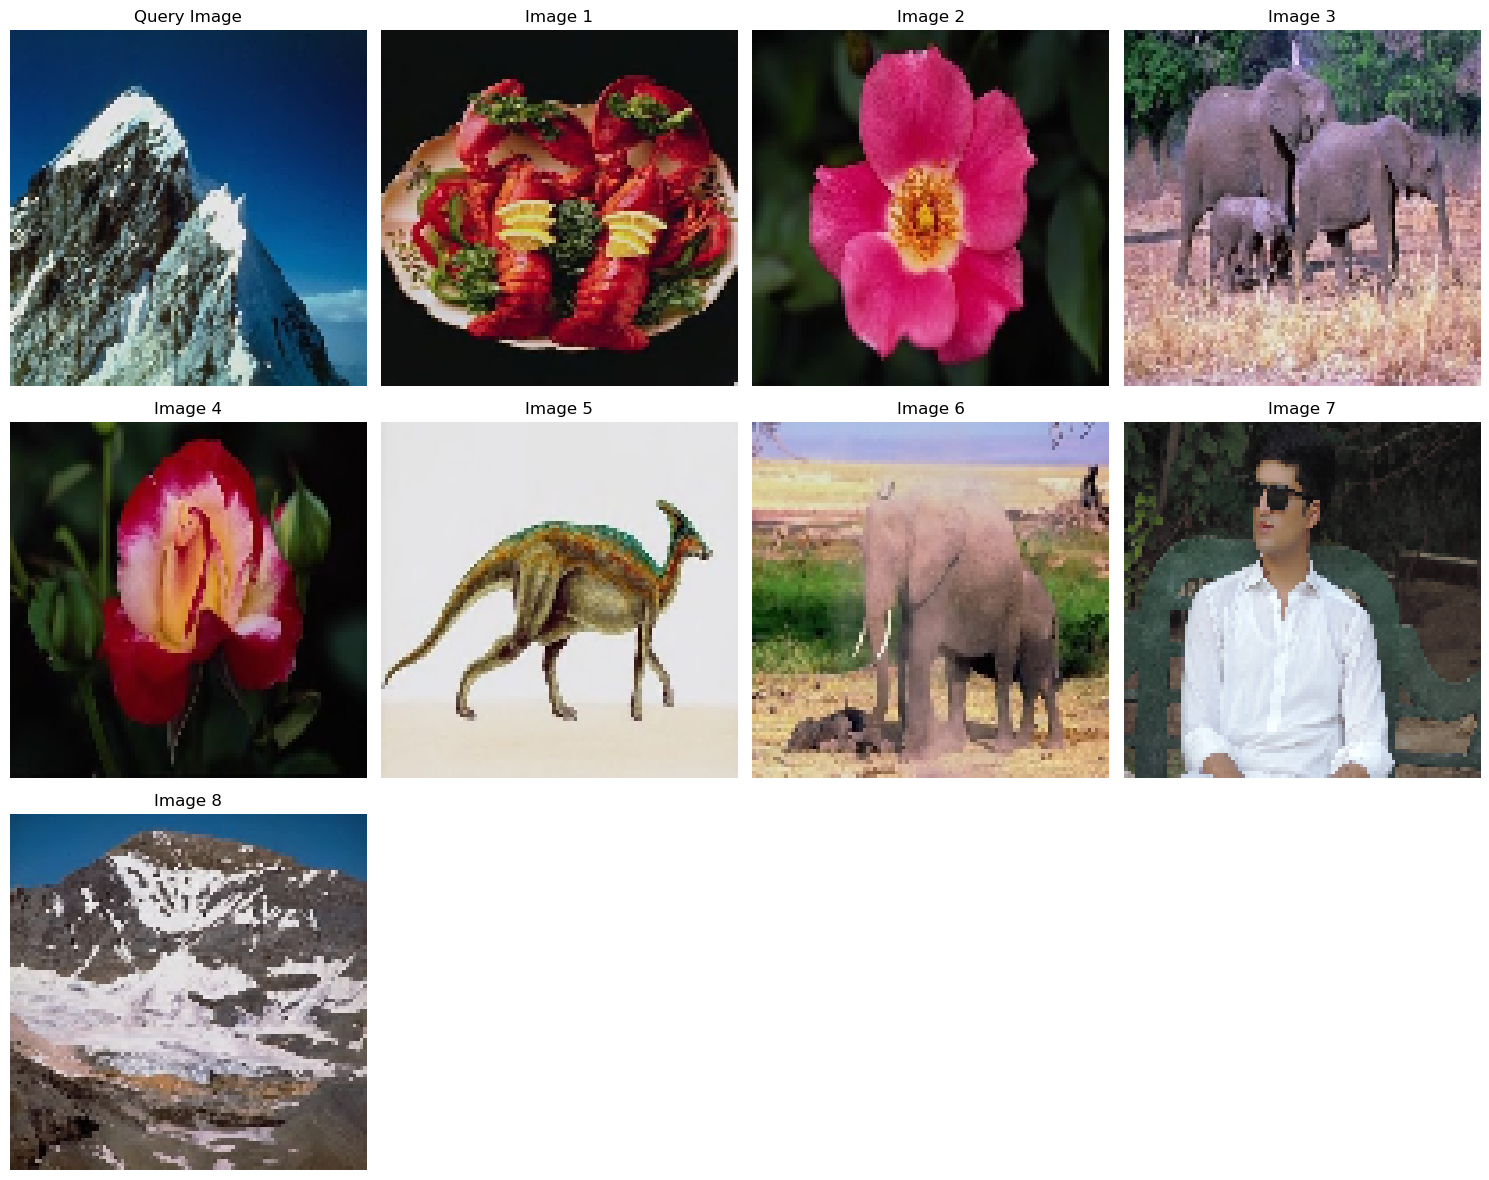

In [72]:
# Display query image and similar images
plot_similar_images(query_image, similar_images)